## SDSS Astroquery

This notebook can retrieve OBJID, images and other metadata by coordinates from the SDSS DR7 database (https://skyserver.sdss.org/dr7/en/tools/search/), or any other SDSS data release.

The SDSS DR7 database was used in the Galaxy Zoo 1 classification data (https://data.galaxyzoo.org/)

Unfortunately, no astroquery API exists to get files or metadata from the DESI Legacy Imaging Surveys (Jia et al 2023 used DESI DR9, DESI DR8 is available on galahad).

In [27]:
import numpy as np
import pandas as pd
import astropy.units as u
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import make_lupton_rgb

In [41]:
CATALOG_PATH = '../Data/gz1_desi_cross_cat.csv'
catalog = pd.read_csv(CATALOG_PATH)

In [69]:
def get_sdss_7_data(coords,radius="1 arcsec"):
    #xid = SDSS.query_crossid(coords, radius="5 arcsec",data_release=17)
    xid = SDSS.query_region(coords,data_release=7,radius=radius,photoobj_fields=["objID","ra","dec","r","err_r","petroMagErr_r","petroR50_r","petroR50Err_r"],spectro=True)
    if xid is not None:
        #print(f"{len(xid)} object found")
        #print(xid['objID'][0])
        #print(xid[0])
        #galaxy = xid[0]
        if len(xid)>1:
            print(f"{len(xid)} object found")
        return xid[0]
    else:
        print("Not found")
        return -1

for i in range(0,10):

    galaxy_1 = catalog.loc[i]
    
    search_position = SkyCoord(galaxy_1["RA"],galaxy_1["DEC"],unit=(u.hourangle, u.deg))
    result = get_sdss_7_data(search_position)
    print(f"{galaxy_1['OBJID']} {result['objID']}")
    #print(result)


587727177912680556 587727177912680556
587727177912615038 587727177912615038
587727177912680543 587727177912680543
587727177912811683 587727177912811683
587727177912811649 587727177912811649
587727177912811659 587727177912811659
587727177912877107 587727177912877107
587727177913008262 587727177913008262
587727177913204856 587727177913204856
587727177913204910 587727177913204910


In [ ]:
def get_sdss_7_image(coords,radius='5 arcsec'):
    #xid = SDSS.query_crossid(coords, radius="5 arcsec",data_release=17)
    xid = SDSS.query_crossid(coords,data_release=17)
    if xid is not None:
        #print(xid['objID','ra','dec'])
        #print(xid['objid','ra','dec'])
        #print(xid)
        galaxy = xid[0]
        galaxy_coords = SkyCoord(galaxy['ra'], galaxy['dec'],unit=u.deg)
        img_i = SDSS.get_images(coordinates=galaxy_coords,radius=radius,band='i',show_progress=True)
        img_r = SDSS.get_images(coordinates=galaxy_coords,radius=radius,band='r',show_progress=True)
        img_g = SDSS.get_images(coordinates=galaxy_coords,radius=radius,band='g',show_progress=True)
        return img_i[0], img_r[0], img_g[0], galaxy_coords
    else:
        print("Not found")
        return -1
    
search_position = SkyCoord('12:45:00.61 +37:36:40.8',unit=(u.hourangle,u.deg))

search_position = SkyCoord(208.3694,18.2849,unit=u.deg) #Clear spiral

search_position = SkyCoord(220.235,-0.318,unit=u.deg) #Looks really impressive

#search_position = SkyCoord('00:02:05.65 -11:12:38.1',unit=u.deg)

print(get_sdss_7_data(search_position))
#img_i, img_r, img_g, found_coords = get_sdss_7_image(search_position)
#print(img_i.info())

In [3]:
def plot_image(image, wcs):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(projection=wcs) 
    ax.imshow(image.data)
    lon, lat = ax.coords
    lon.set_ticks(color='red')
    lon.set_ticks_position('lbtr')
    lon.set_ticklabel_position('lbtr')
    lat.set_ticks(color='blue')
    lat.set_ticks_position('lbtr')
    lat.set_ticklabel_position('lbtr')
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

def plot_image2(image):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot() 
    ax.imshow(image.data)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

def crop_image(image,coords,size=(50,50)):
    wcs = WCS(image[0].header)
    cropped = Cutout2D(image[0].data, coords, size, wcs)
    return cropped

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]


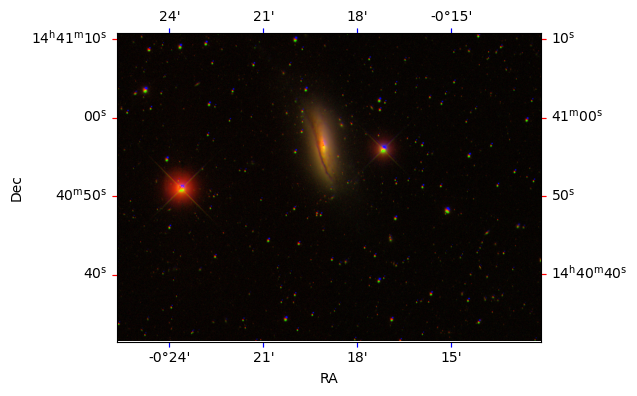

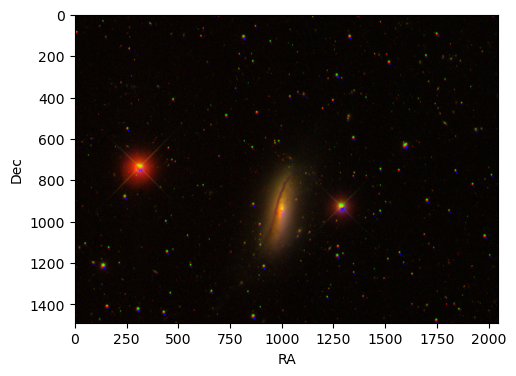

In [4]:
wcs = WCS(img_i[0].header)
full_image = make_lupton_rgb(img_i[0].data, img_r[0].data, img_g[0].data,Q=10, stretch=0.5)
plot_image(full_image,wcs)
plot_image2(full_image)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Changed DATE-OBS from '21/03/99' to '1999-03-21''. [astropy.wcs.wcs]


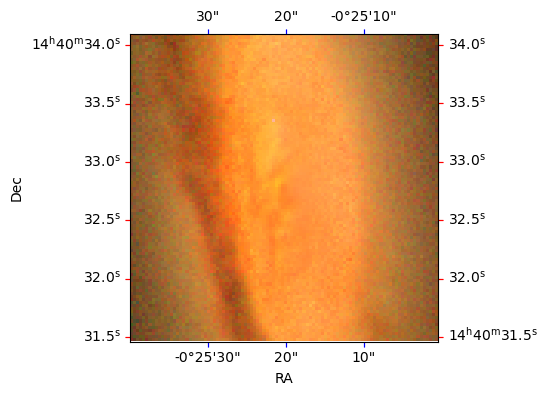

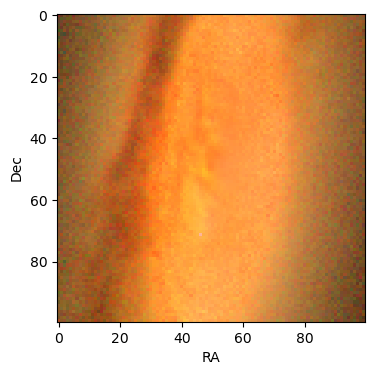

In [5]:
size=(100,100)
cropped_i = crop_image(img_i,found_coords,size)
cropped_r = crop_image(img_r,found_coords,size)
cropped_g = crop_image(img_g,found_coords,size)

cropped_image = make_lupton_rgb(cropped_i.data, cropped_r.data, cropped_g.data,Q=5, stretch=0.5)

plot_image(cropped_image,wcs)
plot_image2(cropped_image)
